Auteur : Antoine Chesnais  
Date dernière version : 29/10/2019  
Description : Ce notebook contient la partie segmentation du dataset customer / products   
Librairies utilisées : Pandas, Numpy, Matplolib, Seaborn, sklearn

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Les-données" data-toc-modified-id="Les-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Les données</a></span></li><li><span><a href="#ACP" data-toc-modified-id="ACP-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ACP</a></span><ul class="toc-item"><li><span><a href="#Pré-traitement-et-entrainement" data-toc-modified-id="Pré-traitement-et-entrainement-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pré-traitement et entrainement</a></span></li><li><span><a href="#Résultats" data-toc-modified-id="Résultats-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Résultats</a></span></li></ul></li><li><span><a href="#NFM" data-toc-modified-id="NFM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NFM</a></span><ul class="toc-item"><li><span><a href="#Entrainement" data-toc-modified-id="Entrainement-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Entrainement</a></span></li><li><span><a href="#Résultats" data-toc-modified-id="Résultats-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Résultats</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import NMF, PCA

In [2]:
sns.set_style("whitegrid")

# Les données

In [3]:
BDD_CP = pd.read_csv('BDD_customers_products.csv', index_col='customer_unique_id')

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(BDD_CP.head(100))

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,129.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,18.90,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,69.0,0.0,0.00,0.00,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,25.99,0.00,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,180.00,0.00,0.0
0004bd2a26a76fe21f786e4fbd80607f,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,154.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0
00050ab1314c0e55a6ca13cf7181fecf,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,27.99,0.00,0.0
00053a61a98854899e70ed204dd4bafe,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,382.00,0.0,0.0,0.00,0.00,0.0
0005e

In [5]:
#fig, axes = plt.subplots(nrows=11, ncols=7, figsize=(20,30))
#for i, column in enumerate(BDD_CP.columns):
#    sns.distplot(BDD_CP[column],ax=axes[i//7,i%7])

Les catégories de produits étant nombreuses (71), on testera différentes techniques pour réduire la dimension du dataset pour ensuite effectuer un clustering.

# ACP

Dans un premier temps on testera l'utilisation d'une ACP (analyse en composante principale) afin d'identifier d'éventuels axes qui présenteraient une variance plus importante. Cela permettrait d'identifier des axes permettant de distinguer les groupes de clients entre eux.

## Pré-traitement et entrainement

In [6]:
scaler_PCA = StandardScaler()
scaled_data_PCA = scaler_PCA.fit_transform(BDD_CP)

In [7]:
pca = PCA(n_components=10)
pca.fit(scaled_data_PCA)
data_PCA = pca.transform(scaled_data_PCA)

## Résultats

On regarde ensuite le % de la variance totale expliquée par les 10 premiers axes.

In [8]:
PCA_results = pd.DataFrame(pca.explained_variance_ratio_ * 100, columns=['%_variance_explained'])
PCA_results['sum_%_explained_variance'] = PCA_results['%_variance_explained'].cumsum()

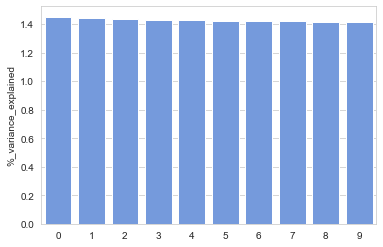

In [12]:
sns.barplot(x=PCA_results.index, y='%_variance_explained', data=PCA_results, color='#6495ed')

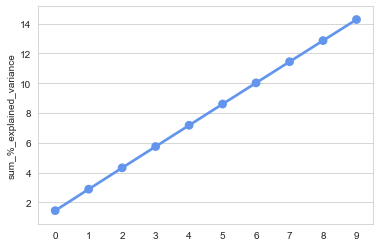

In [13]:
sns.pointplot(x=PCA_results.index, y='sum_%_explained_variance', data=PCA_results, color='#6495ed')

Au final, les 10 premiers axes expliquent tous très peu de variance (1,4%) et ne se distinguent pas les uns des autres. Le résultat de l'ACP n'est donc pas exploitable.

# NFM

Dans un second temps, on teste un algorithme de Factorisation en Matrice Non Négative. Cela permet également de réduire la dimension du dataset, en identifiant des axes latents qui pourraient recouper plusieurs catégories de produits ensemble.

## Entrainement

On fixe initialement la nombre de features latentes à estimer à 5. Si les résultats sont intéressants, il faudra tester plusieurs valeurs afin d'identifier le nombre d'axes optimal pour trouver la combinaison qui fait le plus de sens.

In [15]:
nmf = NMF(5)
nmf.fit(BDD_CP)
components = pd.DataFrame(nmf.components_, columns=BDD_CP.columns)

## Résultats

In [16]:
display(components)

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,0.000010,0.000009,0.000017,0.000007,0.166262,0.240179,0.019466,0.063900,0.000210,1.207338e-07,...,0.0,0.000000,0.030639,1.837703e-05,0.000000,0.009689,0.000031,0.032024,0.080149,159.257415
1,0.000029,0.000039,0.000045,0.000027,0.004477,0.051512,0.029549,0.201899,0.006557,2.690728e-07,...,0.0,0.001130,0.113244,1.876884e-05,0.000000,0.044159,0.001480,0.019835,0.061841,0.000000
2,0.000020,0.002209,0.000028,0.000018,0.003827,0.072750,0.004140,0.123009,0.000004,0.000000e+00,...,0.0,0.057044,0.000798,7.808127e-06,0.000000,0.034914,0.000982,0.054641,0.021624,0.000000
3,0.000004,0.000021,0.000026,0.000008,0.000043,0.000174,0.000298,0.033930,0.000004,3.063016e-10,...,0.0,0.000000,0.000036,3.299424e-08,0.000000,0.000025,0.000002,0.000013,0.000077,0.000000
4,0.000080,0.009044,0.000065,0.000062,0.000996,0.508882,0.046084,0.361725,0.000006,5.322940e-07,...,0.0,0.007751,0.079556,6.781958e-05,137.804738,0.011973,0.000066,0.056199,0.152490,0.000000


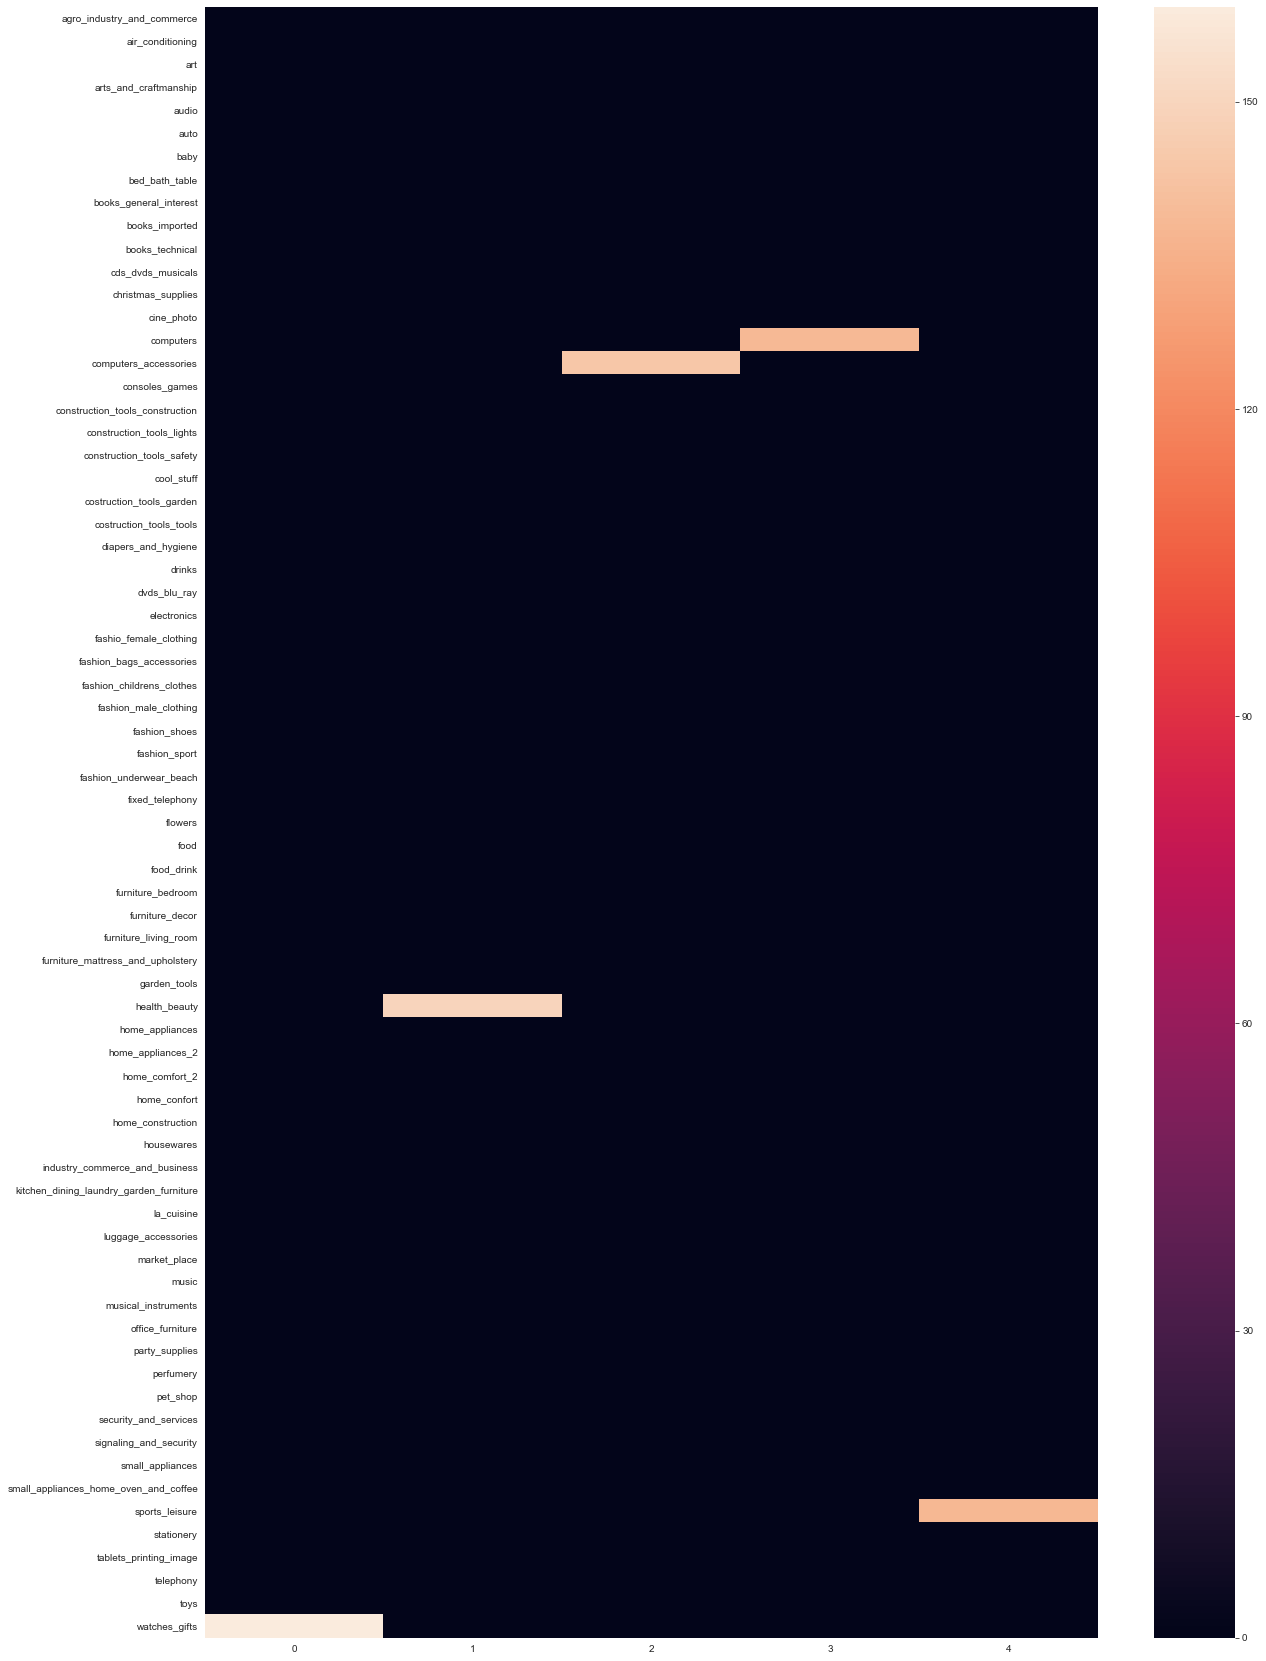

In [24]:
fig, ax = plt.subplots(figsize=(20,30))
sns.heatmap(components.T, ax=ax)

Au final, comme pour l'ACP, les résultats ne sont pas concluants. En effet les axes latents découverts par la NFM sont constitués très majoritairement d'une seule feature initiale au lieu d'une combinaison de celles ci. Cela reviendrait à sélectionner uniquement une petite partie des variables initiales, la perte d'informations serait bien trop importante.

# Conclusion

Pour conclure, les algorithmes de réduction de dimension n'ayant pas donné de résultats satisfaisants, un clustering pertinent semble difficile à obtenir. On préfera ainsi laisser de côté l'aspect clients/produits pour se concentrer sur une segmentation basée sur le dataset clients/commandes.  
L'échec des algorithmes de réduction de dimension, et en particulier de la NFM, vient du fait que les clients ont dans une très grande majorité des cas effectué une seule commande et que ces dernières sont également très souvent mono-produit. Cette particularité du dataset fait qu'il n'est donc pas possible d'établir de liens entre les catégories de produits. 